# Level1 - Student dataset Preprocessing

## Part 1 – Data Cleaning

### Check dataset structure

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("bi.csv", encoding="latin1")

In [3]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [4]:
df.shape

(77, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


### Detect inconsistent categories

In [6]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [7]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [8]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [9]:
df['gender'] = df['gender'].replace(["male", "Male"], "M")

In [10]:
df['gender'] = df['gender'].replace(["female", "Female"], "F")

In [11]:
df['country'] = df['country'].replace(["norway","Norge"], "Norway")

In [12]:
df['country'] = df['country'].replace("Rsa", "South Africa")

In [13]:
df['prevEducation'] = df['prevEducation'].replace(["Diplomaaa", "diploma", "DIPLOMA"], "Diploma")

In [14]:
df['prevEducation'] = df['prevEducation'].replace("High School", "HighSchool")

In [15]:
df['prevEducation'] = df['prevEducation'].replace("Barrrchelors", "Bachelors")

In [16]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [17]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'South Africa', 'Denmark',
       'Netherlands', 'Italy', 'Spain', 'UK', 'Somali', 'Nigeria',
       'Germany', 'France'], dtype=object)

In [18]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'Bachelors', 'Doctorate'],
      dtype=object)

In [19]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,120,NaN,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,122,91.0,80


## Handle duplicates

In [20]:
df.duplicated().sum()

np.int64(0)

## Part 2 – Missing Data

### Identify missing values

In [21]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

### Impute missing values

In [22]:
df.fillna({"Python": df["Python"].median()}, inplace=True)

In [23]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,120,81.0,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,122,91.0,80


## Part 3 – Outliers

### Detect outliers

In [24]:
import seaborn as sns

In [25]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,149.714286,75.987013,69.467532
std,10.341966,16.475784,12.743272,15.228517,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


<Axes: xlabel='studyHOURS'>

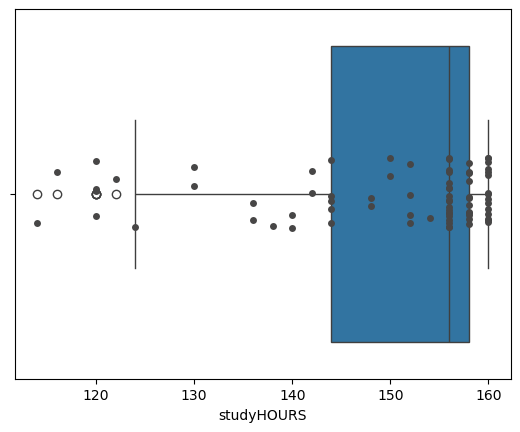

In [26]:
sns.boxplot(x='studyHOURS', data=df)
sns.stripplot(x='studyHOURS', data=df, color="#474646")

<Axes: xlabel='Age'>

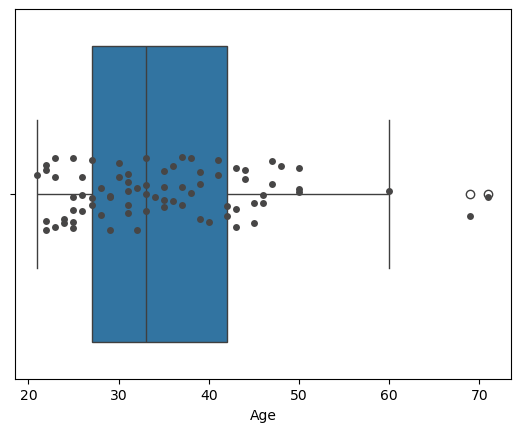

In [27]:
sns.boxplot(x='Age', data=df)
sns.stripplot(x='Age', data=df, color="#474646")

### Handle outliers

In [28]:
from datasist.structdata import detect_outliers

In [29]:
outliers_indices = detect_outliers(df, 0, ['studyHOURS'])
col_median = df['studyHOURS'].median()
df.loc[outliers_indices, 'studyHOURS'] = col_median

In [30]:
df["studyHOURS"].describe()

count     77.000000
mean     153.090909
std        8.134044
min      124.000000
25%      152.000000
50%      156.000000
75%      158.000000
max      160.000000
Name: studyHOURS, dtype: float64

In [31]:
df.to_csv("cleaned_data.csv", index=False)

# Level2 - Student dataset Preprocessing

##  Part 4 – Feature Engineering

In [32]:
df['Programming_Avg'] = (df['Python'] + df['DB'])/2
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55,57.0
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75,67.5
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50,62.0
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,156,81.0,44,62.5
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,156,91.0,80,85.5


In [33]:
df['isAdult'] = df['Age'] >= 25
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55,57.0,True
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75,67.5,True
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50,62.0,True
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,156,81.0,44,62.5,False
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,156,91.0,80,85.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,F,France,Private,80,Bachelors,150,75.0,43,59.0,True
73,Julian,Nielsen,31,M,Denmark,Sognsvann,90,Masters,158,84.0,83,83.5,True
74,Sophie,Brown,33,F,UK,Sognsvann,96,Masters,158,85.0,90,87.5,True
75,Leon,Bauer,35,M,Germany,Sognsvann,90,Masters,160,87.0,74,80.5,True


In [34]:
def categorie_hours(h):
    if h < 152:
        return 'Low'
    elif h <= 158:
        return 'Medium'
    else:
        return 'High'

df['studyHOURS_cat'] = df['studyHOURS'].apply(categorie_hours)
df['isAdult'] = df['isAdult'].astype(int)
df.head()


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,studyHOURS_cat
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55,57.0,1,Medium
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75,67.5,1,Low
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50,62.0,1,Low
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,156,81.0,44,62.5,0,Medium
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,156,91.0,80,85.5,0,Medium


## Part 5 – Feature Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB,Programming_Avg,isAdult
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,153.090909,75.987013,69.467532,72.727273,0.870130
std,10.341966,16.475784,8.134044,15.228517,17.033701,13.674685,0.338365
min,21.000000,28.000000,124.000000,15.000000,30.000000,31.500000,0.000000
25%,27.000000,69.000000,152.000000,72.000000,56.000000,65.000000,1.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000,74.500000,1.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000,84.000000,1.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000,93.000000,1.000000


In [37]:
numeric_cols = ['Age','entryEXAM' , 'Python', 'DB', 'studyHOURS', 'Programming_Avg']
df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,studyHOURS_cat
0,Christina,Binger,0.46,F,Norway,Private,0.628571,Masters,0.944444,0.578947,0.357143,0.414634,1,Medium
1,Alex,Walekhwa,0.78,M,Kenya,Private,0.728571,Diploma,0.722222,0.592105,0.642857,0.585366,1,Low
2,Philip,Leo,0.08,M,Uganda,Sognsvann,0.385714,HighSchool,0.166667,0.776316,0.285714,0.495935,1,Low
3,Shoni,Hlongwane,0.02,F,South Africa,Sognsvann,0.171429,HighSchool,0.888889,0.868421,0.200000,0.504065,0,Medium
4,Maria,Kedibone,0.04,F,South Africa,Sognsvann,0.528571,HighSchool,0.888889,1.000000,0.714286,0.878049,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,0.44,F,France,Private,0.742857,Bachelors,0.722222,0.789474,0.185714,0.447154,1,Low
73,Julian,Nielsen,0.20,M,Denmark,Sognsvann,0.885714,Masters,0.944444,0.907895,0.757143,0.845528,1,Medium
74,Sophie,Brown,0.24,F,UK,Sognsvann,0.971429,Masters,0.944444,0.921053,0.857143,0.910569,1,Medium
75,Leon,Bauer,0.28,M,Germany,Sognsvann,0.885714,Masters,1.000000,0.947368,0.628571,0.796748,1,High


##  Part 6 – Encoding Categorical Data

In [38]:
from category_encoders import BinaryEncoder

In [39]:
encoder = BinaryEncoder()

In [40]:
Transformed_gender_Df = encoder.fit_transform(df[['gender']])
Transformed_gender_Df

,gender_0,gender_1
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
72,0,1
73,1,0
74,0,1
75,1,0


In [41]:
df = pd.concat([df,Transformed_gender_Df] , axis = 1 )
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,studyHOURS_cat,gender_0,gender_1
0,Christina,Binger,0.46,F,Norway,Private,0.628571,Masters,0.944444,0.578947,0.357143,0.414634,1,Medium,0,1
1,Alex,Walekhwa,0.78,M,Kenya,Private,0.728571,Diploma,0.722222,0.592105,0.642857,0.585366,1,Low,1,0
2,Philip,Leo,0.08,M,Uganda,Sognsvann,0.385714,HighSchool,0.166667,0.776316,0.285714,0.495935,1,Low,1,0
3,Shoni,Hlongwane,0.02,F,South Africa,Sognsvann,0.171429,HighSchool,0.888889,0.868421,0.200000,0.504065,0,Medium,0,1
4,Maria,Kedibone,0.04,F,South Africa,Sognsvann,0.528571,HighSchool,0.888889,1.000000,0.714286,0.878049,0,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,0.44,F,France,Private,0.742857,Bachelors,0.722222,0.789474,0.185714,0.447154,1,Low,0,1
73,Julian,Nielsen,0.20,M,Denmark,Sognsvann,0.885714,Masters,0.944444,0.907895,0.757143,0.845528,1,Medium,1,0
74,Sophie,Brown,0.24,F,UK,Sognsvann,0.971429,Masters,0.944444,0.921053,0.857143,0.910569,1,Medium,0,1
75,Leon,Bauer,0.28,M,Germany,Sognsvann,0.885714,Masters,1.000000,0.947368,0.628571,0.796748,1,High,1,0


In [42]:
Transformed_country_Df = encoder.fit_transform(df[['country']])
Transformed_country_Df

,country_0,country_1,country_2,country_3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
72,1,1,0,1
73,0,1,0,1
74,1,0,0,1
75,1,1,0,0


In [43]:
df = pd.concat([df,Transformed_country_Df] , axis = 1 )
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,studyHOURS_cat,gender_0,gender_1,country_0,country_1,country_2,country_3
0,Christina,Binger,0.46,F,Norway,Private,0.628571,Masters,0.944444,0.578947,0.357143,0.414634,1,Medium,0,1,0,0,0,1
1,Alex,Walekhwa,0.78,M,Kenya,Private,0.728571,Diploma,0.722222,0.592105,0.642857,0.585366,1,Low,1,0,0,0,1,0
2,Philip,Leo,0.08,M,Uganda,Sognsvann,0.385714,HighSchool,0.166667,0.776316,0.285714,0.495935,1,Low,1,0,0,0,1,1
3,Shoni,Hlongwane,0.02,F,South Africa,Sognsvann,0.171429,HighSchool,0.888889,0.868421,0.200000,0.504065,0,Medium,0,1,0,1,0,0
4,Maria,Kedibone,0.04,F,South Africa,Sognsvann,0.528571,HighSchool,0.888889,1.000000,0.714286,0.878049,0,Medium,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,0.44,F,France,Private,0.742857,Bachelors,0.722222,0.789474,0.185714,0.447154,1,Low,0,1,1,1,0,1
73,Julian,Nielsen,0.20,M,Denmark,Sognsvann,0.885714,Masters,0.944444,0.907895,0.757143,0.845528,1,Medium,1,0,0,1,0,1
74,Sophie,Brown,0.24,F,UK,Sognsvann,0.971429,Masters,0.944444,0.921053,0.857143,0.910569,1,Medium,0,1,1,0,0,1
75,Leon,Bauer,0.28,M,Germany,Sognsvann,0.885714,Masters,1.000000,0.947368,0.628571,0.796748,1,High,1,0,1,1,0,0


In [44]:
Transformed_residence_Df = encoder.fit_transform(df[['residence']])
Transformed_residence_Df

,residence_0,residence_1,residence_2
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
72,0,0,1
73,0,1,0
74,0,1,0
75,0,1,0


In [45]:
df = pd.concat([df,Transformed_residence_Df] , axis = 1 )
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,...,studyHOURS_cat,gender_0,gender_1,country_0,country_1,country_2,country_3,residence_0,residence_1,residence_2
0,Christina,Binger,0.46,F,Norway,Private,0.628571,Masters,0.944444,0.578947,...,Medium,0,1,0,0,0,1,0,0,1
1,Alex,Walekhwa,0.78,M,Kenya,Private,0.728571,Diploma,0.722222,0.592105,...,Low,1,0,0,0,1,0,0,0,1
2,Philip,Leo,0.08,M,Uganda,Sognsvann,0.385714,HighSchool,0.166667,0.776316,...,Low,1,0,0,0,1,1,0,1,0
3,Shoni,Hlongwane,0.02,F,South Africa,Sognsvann,0.171429,HighSchool,0.888889,0.868421,...,Medium,0,1,0,1,0,0,0,1,0
4,Maria,Kedibone,0.04,F,South Africa,Sognsvann,0.528571,HighSchool,0.888889,1.000000,...,Medium,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,0.44,F,France,Private,0.742857,Bachelors,0.722222,0.789474,...,Low,0,1,1,1,0,1,0,0,1
73,Julian,Nielsen,0.20,M,Denmark,Sognsvann,0.885714,Masters,0.944444,0.907895,...,Medium,1,0,0,1,0,1,0,1,0
74,Sophie,Brown,0.24,F,UK,Sognsvann,0.971429,Masters,0.944444,0.921053,...,Medium,0,1,1,0,0,1,0,1,0
75,Leon,Bauer,0.28,M,Germany,Sognsvann,0.885714,Masters,1.000000,0.947368,...,High,1,0,1,1,0,0,0,1,0


In [46]:
prevEducation_dict = {'HighSchool':1,
        'Diploma':2,
        'Bachelors':3,
        'Masters':4,
        'Doctorate':5}

# apply using map
df['prevEducation'] = df['prevEducation'].map(prevEducation_dict)

In [47]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,...,studyHOURS_cat,gender_0,gender_1,country_0,country_1,country_2,country_3,residence_0,residence_1,residence_2
0,Christina,Binger,0.46,F,Norway,Private,0.628571,4,0.944444,0.578947,...,Medium,0,1,0,0,0,1,0,0,1
1,Alex,Walekhwa,0.78,M,Kenya,Private,0.728571,2,0.722222,0.592105,...,Low,1,0,0,0,1,0,0,0,1
2,Philip,Leo,0.08,M,Uganda,Sognsvann,0.385714,1,0.166667,0.776316,...,Low,1,0,0,0,1,1,0,1,0
3,Shoni,Hlongwane,0.02,F,South Africa,Sognsvann,0.171429,1,0.888889,0.868421,...,Medium,0,1,0,1,0,0,0,1,0
4,Maria,Kedibone,0.04,F,South Africa,Sognsvann,0.528571,1,0.888889,1.000000,...,Medium,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,0.44,F,France,Private,0.742857,3,0.722222,0.789474,...,Low,0,1,1,1,0,1,0,0,1
73,Julian,Nielsen,0.20,M,Denmark,Sognsvann,0.885714,4,0.944444,0.907895,...,Medium,1,0,0,1,0,1,0,1,0
74,Sophie,Brown,0.24,F,UK,Sognsvann,0.971429,4,0.944444,0.921053,...,Medium,0,1,1,0,0,1,0,1,0
75,Leon,Bauer,0.28,M,Germany,Sognsvann,0.885714,4,1.000000,0.947368,...,High,1,0,1,1,0,0,0,1,0


In [48]:
df = df.drop(['fNAME', 'lNAME', 'country', 'residence'], axis=1)
df

,Age,gender,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,studyHOURS_cat,gender_0,gender_1,country_0,country_1,country_2,country_3,residence_0,residence_1,residence_2
0,0.46,F,0.628571,4,0.944444,0.578947,0.357143,0.414634,1,Medium,0,1,0,0,0,1,0,0,1
1,0.78,M,0.728571,2,0.722222,0.592105,0.642857,0.585366,1,Low,1,0,0,0,1,0,0,0,1
2,0.08,M,0.385714,1,0.166667,0.776316,0.285714,0.495935,1,Low,1,0,0,0,1,1,0,1,0
3,0.02,F,0.171429,1,0.888889,0.868421,0.200000,0.504065,0,Medium,0,1,0,1,0,0,0,1,0
4,0.04,F,0.528571,1,0.888889,1.000000,0.714286,0.878049,0,Medium,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.44,F,0.742857,3,0.722222,0.789474,0.185714,0.447154,1,Low,0,1,1,1,0,1,0,0,1
73,0.20,M,0.885714,4,0.944444,0.907895,0.757143,0.845528,1,Medium,1,0,0,1,0,1,0,1,0
74,0.24,F,0.971429,4,0.944444,0.921053,0.857143,0.910569,1,Medium,0,1,1,0,0,1,0,1,0
75,0.28,M,0.885714,4,1.000000,0.947368,0.628571,0.796748,1,High,1,0,1,1,0,0,0,1,0
